# Introduction


**What?** Illustration of prior and posterior Gaussian process for different kernels



# Import modules

In [1]:
import numpy as np
from pylab import rcParams
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

# On the difference between Gaussian and Bayesian processes


- **Theory**: a Gaussian process is a probability distribution over possible functions. Gaussian processes know what they don’t know. Gaussian processes let you incorporate expert knowledge.
- **Connection with Bayes’s rule**: Since Gaussian processes let us describe probability distributions over functions we can use Bayes’ rule to update our distribution of functions by observing training data
- **Prior & posterior** are two names used in Bayesian process. Posterior probability is just the conditional probability that is outputted by the Bayes 
theorem. There is nothing special about it, it does not differ anyhow from any other conditional probability, it just has it's own name.
- **GPs are Bayesian** because they involve constructing a prior distribution (here over functions directly rather than over parameters) and updating this distribution by conditioning on the data. 



# Definition of kernels


- 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))


- 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)


- 1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(0.1, 10.0), 
    periodicity_bounds=(1.0, 10.0)),


- ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2)


- 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5) 



# Plotting function


- This example illustrates the prior and posterior of a GPR with different kernels. 
- Mean, standard deviation, and 10 samples are shown for both prior and posterior.



In [13]:
def plotPriorAndPosterior(kernel):
    
    """
    gp.predict() :: on prior data -> prior
    gp.sample()  :: on prior distribution -> prior
    gp.fit()     :: on real  data
    gp.predict() :: on real data -> posterior
    gp.sample()  :: on real data -> posterior
    """
        
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    #***********
    # Plot prior    
    #***********
    rcParams['font.size'] = 25
    plt.figure(figsize=(16, 10))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    
    """
    X_ = [1,2]
    X_[:, np.newaxis] -> [[1], [2]]
    """
    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    
    plt.plot(X_, y_mean, 'k-', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')          
    plt.plot(X_, y_samples, "--", lw = 2)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize = 20)
    
    #********************************
    # Generate random data and fit GP
    #********************************
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    #***************
    # Plot posterior
    #***************
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k-', lw=3, zorder=9)
    
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, "--", lw=1)
    
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize = 20)
    plt.tight_layout()

    plt.show()

# RBF kernel

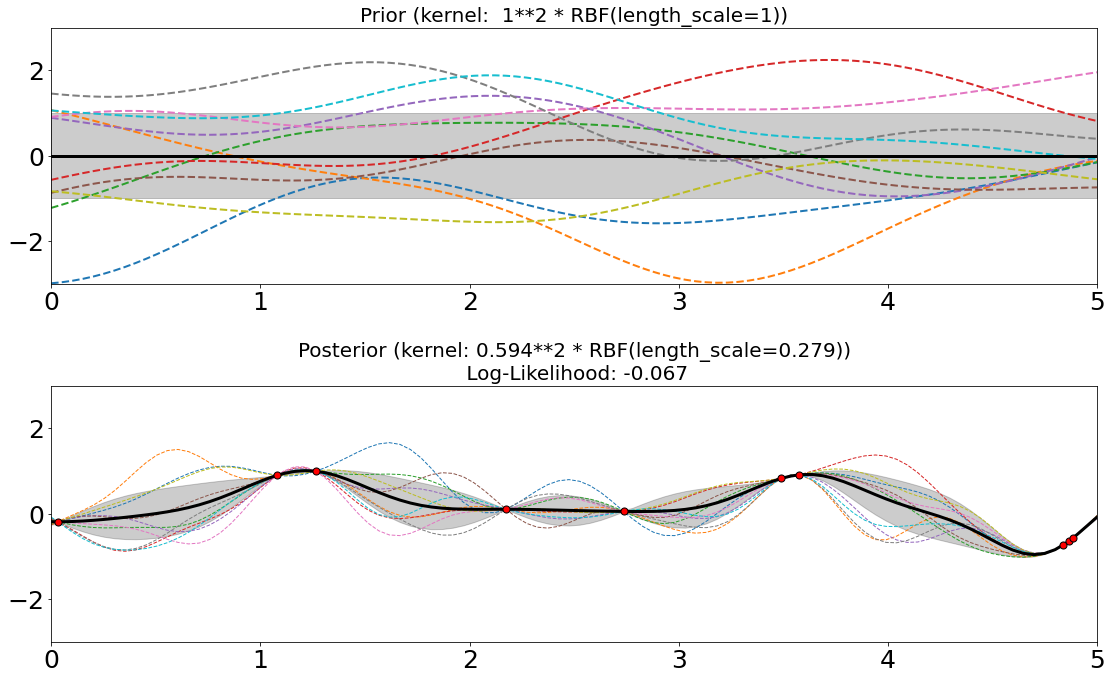

In [14]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
plotPriorAndPosterior(kernel)

# RationalQuadratic kernel

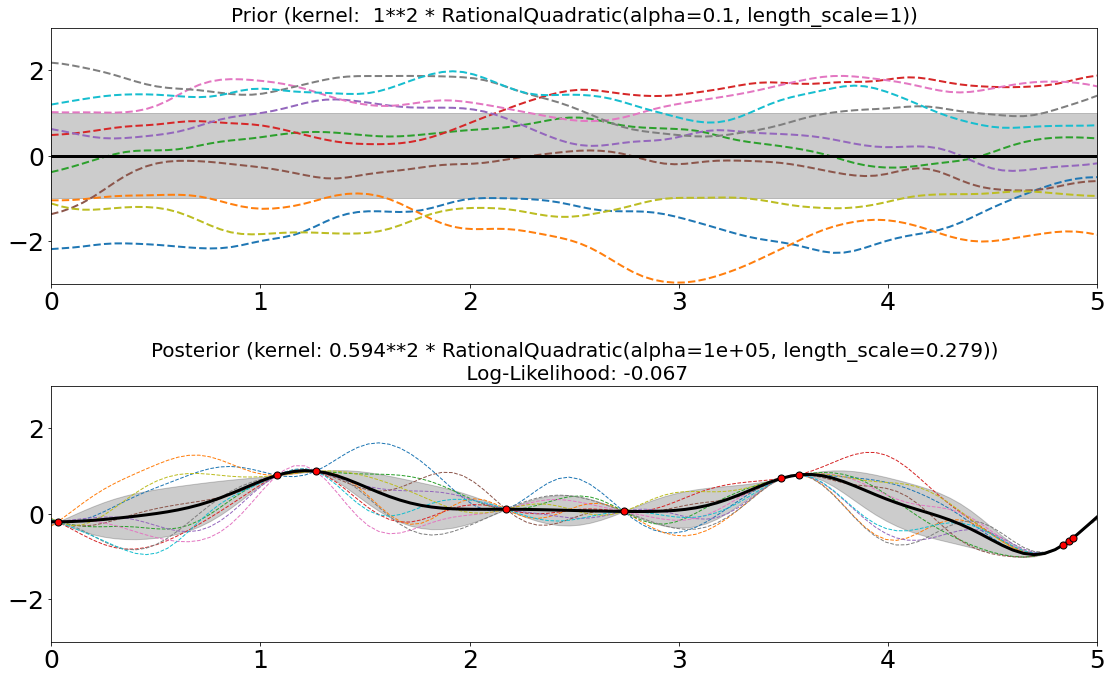

In [15]:
kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
plotPriorAndPosterior(kernel)

# References


- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-prior-posterior-py
- https://stats.stackexchange.com/questions/347526/posterior-vs-conditional-probability
- https://stats.stackexchange.com/questions/84167/is-gaussian-process-regression-a-bayesian-method
- https://towardsdatascience.com/an-intuitive-guide-to-gaussian-processes-ec2f0b45c71d 



# Conclusions


- GPs are Bayesian because they involve constructing a prior distribution (here over functions directly rather than over parameters) and updating this distribution by conditioning on the data.

